# <h1><center> HEART STROKE PREDICTION PROJECT </center></h1>

<div style="text-align: justify"> In this project, i applied a set of machine learning algorithms to predict Heart stroke. A heart stroke, also known as a cerebrovascular accident (CVA) or brain attack, occurs when a blood vessel in the brain becomes blocked or bursts, leading to a lack of oxygen and nutrients to the brain. This can cause brain cells to die and lead to serious health problems, including paralysis, speech and language problems, memory loss, and even death. Risk factors for a heart stroke include high blood pressure, diabetes, obesity, smoking, and a family history of heart disease. It is important to seek medical attention immediately if you suspect someone is experiencing a heart stroke. </div>

<div style="text-align: justify"> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset (publicly available on kaggle) is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.</div>


<div style="text-align: justify"> To begin, data is collected and cleaned to ensure that it is of high quality and ready for analysis. Next, various machine learning algorithms were be applied to the data to build models that can predict the likelihood of a heart stroke. The model is then tested and evaluated to ensure that it is accurate and reliable.</div>



<div style="text-align: justify"> Finally, the model is deployed and used to predict the likelihood of a heart stroke in individuals.</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc # these import our evaluation metrics
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [3]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [59]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [60]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [61]:
df.shape

(5110, 12)

In [62]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [63]:
df.duplicated().sum()

0

In [64]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [66]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [67]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [68]:
cols = list(df.columns)
cols_df=cols[1:]

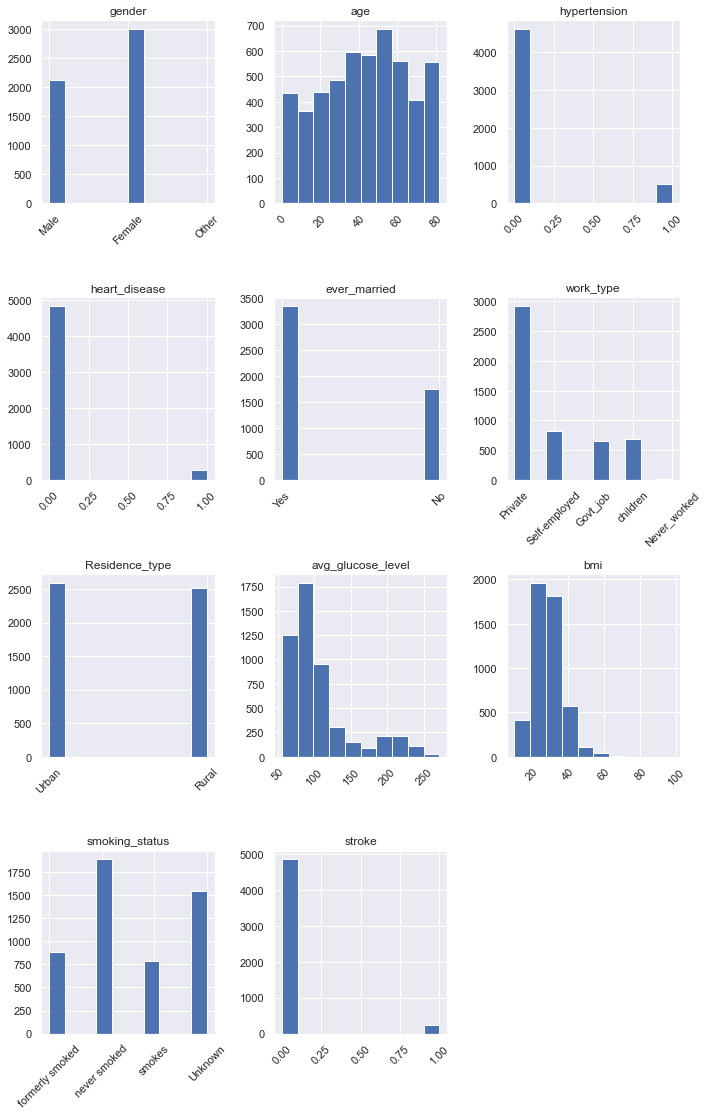

In [69]:
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(df[cols_df[i]])
    
plt.tight_layout()

In [70]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [71]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [72]:
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [73]:
df = df.drop(df[df['gender']=='Other'].index)

In [74]:
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [75]:
print(df['bmi'].mean())
print(df['bmi'].median())

28.894559902200502
28.1


In [76]:
bmi_mean=df['bmi'].mean()
df['bmi']=df['bmi'].fillna(bmi_mean)

In [77]:
df['bmi'].isnull().sum()

0

In [78]:
# counting the number of passengers who are satisfied and who Dissatisfied 
pie_df=pd.DataFrame(df.groupby('stroke')['stroke'].count())
pie_df

,stroke
stroke,
0,4860
1,249


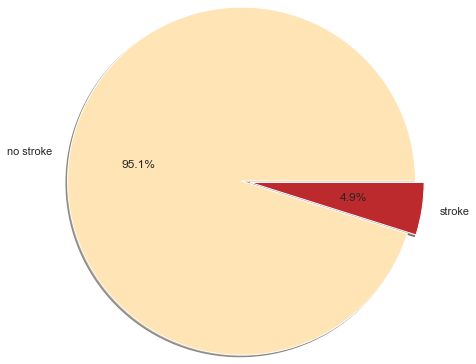

In [79]:
colors = ['#ffe4b5','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

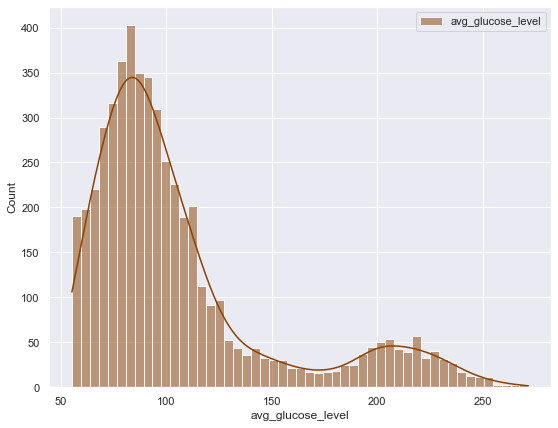

In [80]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(9,7))
sns.histplot(df['avg_glucose_level'], color="#8B4000", label="avg_glucose_level", kde= True)
plt.legend()

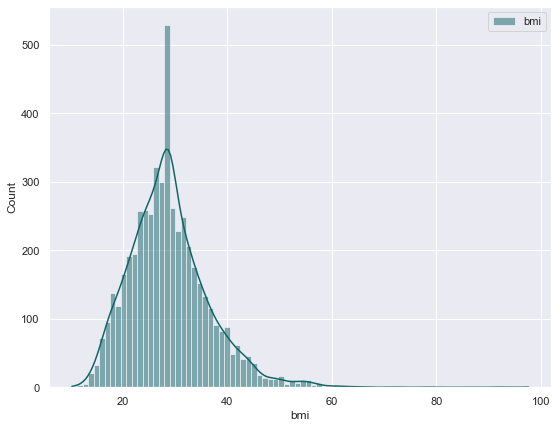

In [81]:
fig = plt.figure(figsize=(9,7))
sns.histplot(df['bmi'], color="#0F6466", label="bmi", kde= True)
plt.legend()

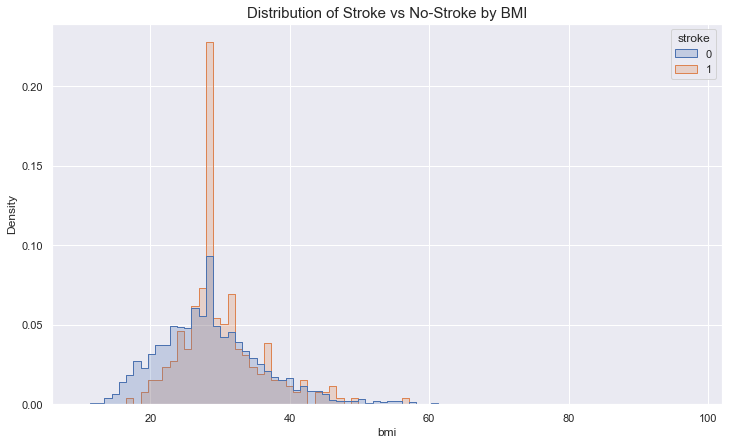

In [82]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Distribution of Stroke vs No-Stroke by BMI', fontsize=15)
plt.show()

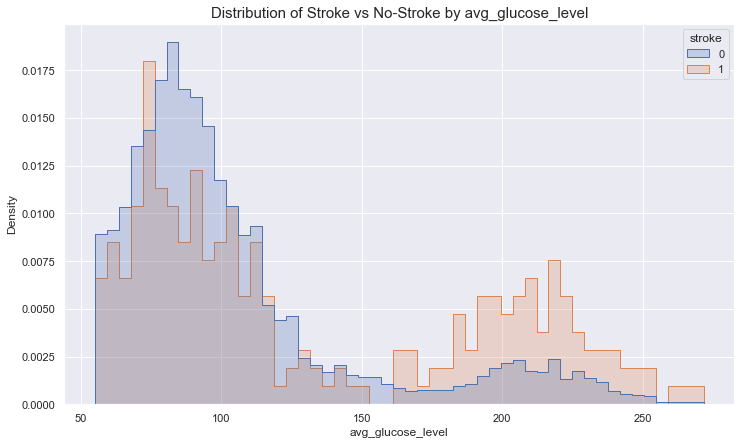

In [83]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Distribution of Stroke vs No-Stroke by avg_glucose_level', fontsize=15)
plt.show()

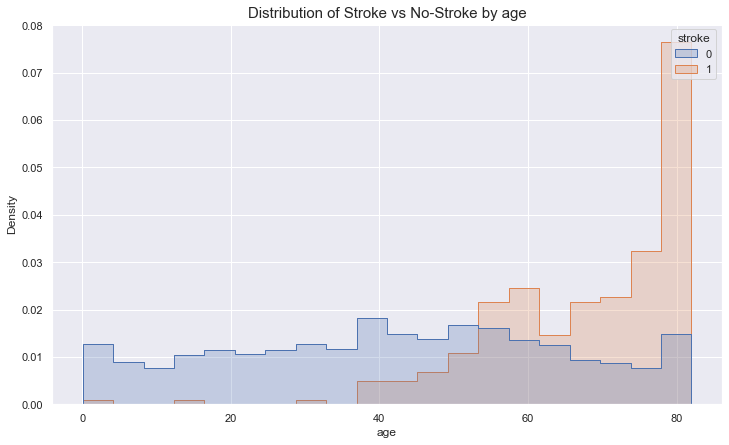

In [84]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Distribution of Stroke vs No-Stroke by age', fontsize=15)
plt.show()

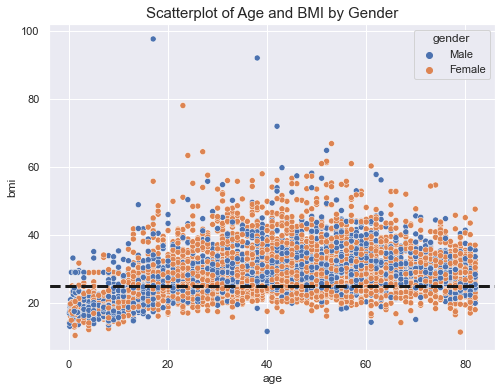

In [85]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df, x="age", y="bmi", hue='gender')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.title('Scatterplot of Age and BMI by Gender', fontsize=15)
plt.show()

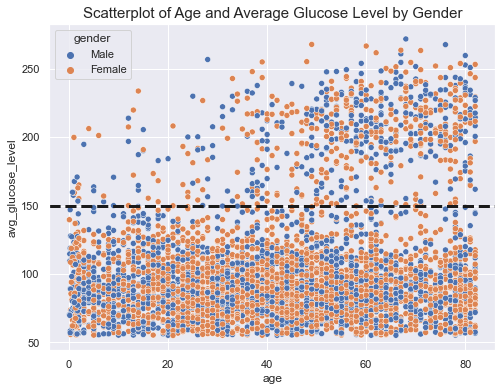

In [86]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
fig.axhline(y= 150, linewidth=3, color='k', linestyle= '--')
plt.title('Scatterplot of Age and Average Glucose Level by Gender', fontsize=15)
plt.show()

In [87]:
df.drop('id',axis=1,inplace=True)

In [88]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(df.loc[:,i].value_counts())
    df[i] = lb.fit_transform(df[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [89]:
df=pd.get_dummies(df)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.89456,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.00000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.60000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.60000,0,0,0,1,0,0,0,1,0,0


In [90]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [91]:
df.to_csv('heart_stroke.csv')

In [94]:
x_data = df.drop("stroke" , axis = 1).values
y_data = df["stroke"]

In [95]:
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.25 , random_state=42)

In [96]:
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

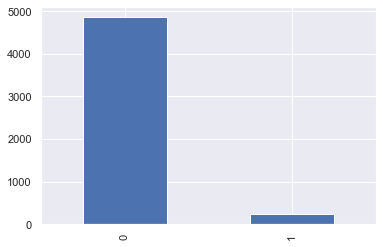

In [97]:
# Here, i want to see the value counts of the calsses in the target
# The results reveal a huge data impalance
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

In [98]:
# To cure this data imbalance, i apply the oversampling technique with the SMOTE algorithm
oversample = SMOTE()
x_data_balanced, y_data_balanced = oversample.fit_resample(x_train, y_train.ravel())

In [99]:
# classification with random forest

rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [100]:
y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

1.0
0.935054773082942


In [101]:
rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

Precision: 0.000
Recall: 0.000
F-measure: 0.000


In [102]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 0.6017216193656094


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

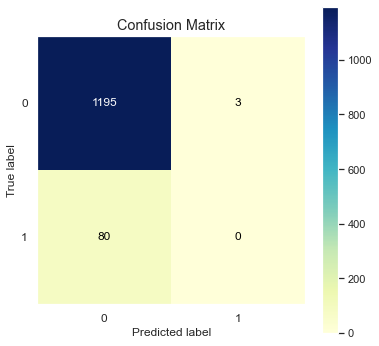

In [103]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf, figsize=(6,6), cmap= 'YlGnBu')

In [104]:
# classification with Decision Trees

dt =DecisionTreeClassifier(max_features=14 , max_depth=12, criterion= 'gini')
dt.fit(x_data_balanced, y_data_balanced)

DecisionTreeClassifier(max_depth=12, max_features=14)

In [105]:
y_pred_train_dt = dt.predict(x_data_balanced)
acc_train_dt = accuracy_score(y_data_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.9210813762971054
0.8145539906103286


In [106]:
dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

Precision: 0.080
Recall: 0.188
F-measure: 0.112


In [107]:
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

ROC AUC Score: 0.5219636894824708


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

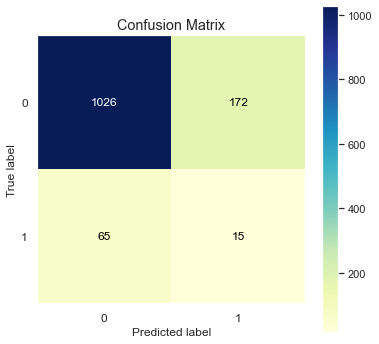

In [108]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

In [109]:
# classification with XGBoost

xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(x_data_balanced, y_data_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [110]:
y_pred_train_xgb = xgb.predict(x_data_balanced)
acc_train_xgb = accuracy_score(y_data_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

0.9460677225559804
0.935054773082942


In [111]:
xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

Precision: 0.000
Recall: 0.000
F-measure: 0.000


In [112]:
y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

ROC AUC Score: 0.6346097662771286


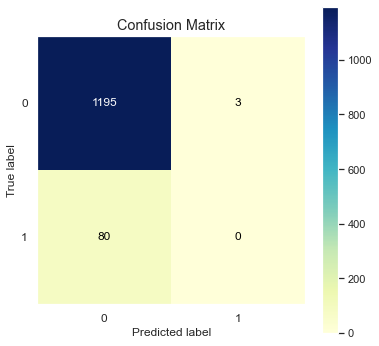

In [113]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

In [114]:
# classification with SVC
svc = SVC(C=100, gamma=1000 ,probability= True)
svc.fit(x_data_balanced, y_data_balanced)

SVC(C=100, gamma=1000, probability=True)

In [115]:
y_pred_train_svc = svc.predict(x_data_balanced)
acc_train_svc = accuracy_score(y_data_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

1.0
0.9374021909233177


In [116]:
svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

Precision: 0.000
Recall: 0.000
F-measure: 0.000


In [117]:
y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

ROC AUC Score: 0.5


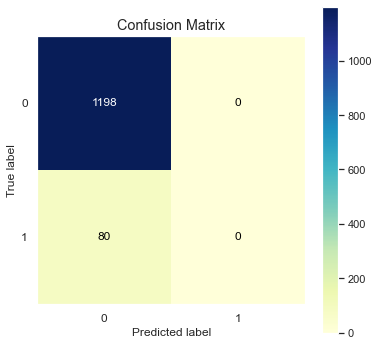

In [118]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');

In [119]:
grid_models = [(SVC(probability=True),[{'C':[10,100], 'gamma':[100,500,1000],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'max_features':[5,6,10,12,14,18,20],'max_depth':[6,10,12,14,18,20] ,'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (XGBClassifier(), [{'learning_rate': [0.01,0.05, 0.1, 0.5, 1], 'eval_metric': ['error']}])]

In [120]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 5)
    grid.fit(x_data_balanced, y_data_balanced)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

SVC(probability=True):
Best Accuracy : 91.06%
Best Parameters :  {'C': 10, 'gamma': 100, 'kernel': 'rbf', 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.43%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 5, 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 95.82%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, ma

In [121]:
# classification with random forest

# Change parameters
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

1.0
0.935054773082942
Precision: 0.000
Recall: 0.000
F-measure: 0.000
ROC AUC Score: 0.6017216193656094


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

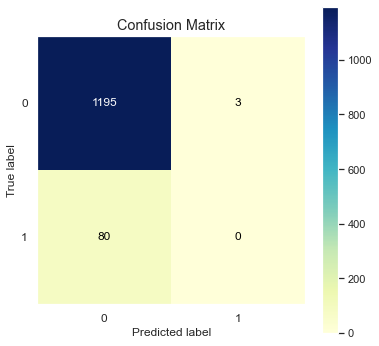

In [122]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf, figsize=(6,6), cmap= 'YlGnBu')

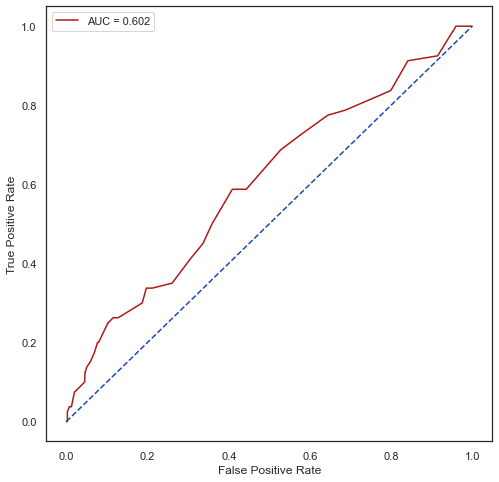

In [123]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [124]:
# Change parameters

dt =DecisionTreeClassifier(max_features=5 , max_depth=12,criterion = 'entropy', random_state=0)
dt.fit(x_data_balanced, y_data_balanced)

y_pred_train_dt = dt.predict(x_data_balanced)
acc_train_dt = accuracy_score(y_data_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

0.9138448935008192
0.9178403755868545
Precision: 0.162
Recall: 0.075
F-measure: 0.103
ROC AUC Score: 0.5243322203672788


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

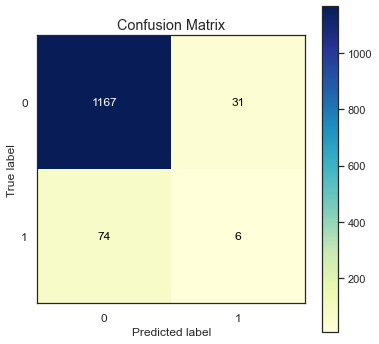

In [125]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

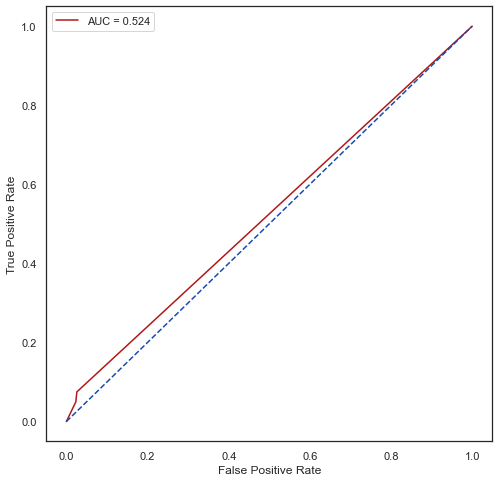

In [126]:
# visualize Roc AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [127]:
# Change parameters

xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(x_data_balanced, y_data_balanced)

y_pred_train_xgb = xgb.predict(x_data_balanced)
acc_train_xgb = accuracy_score(y_data_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

0.9696886947023484
0.9374021909233177
Precision: 0.000
Recall: 0.000
F-measure: 0.000
ROC AUC Score: 0.5323977462437396


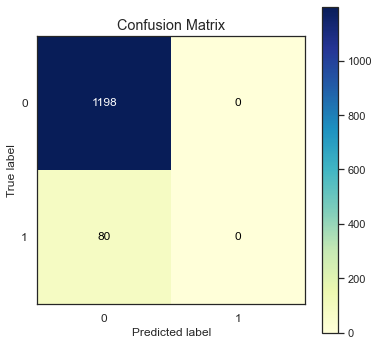

In [128]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

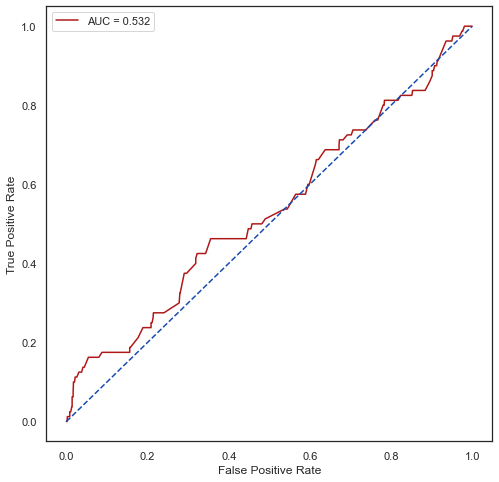

In [129]:
# visualize Roc AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [130]:
svc = SVC(C=10, gamma=1000 ,probability= True)
svc.fit(x_data_balanced, y_data_balanced)

y_pred_train_svc = svc.predict(x_data_balanced)
acc_train_svc = accuracy_score(y_data_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

1.0
0.9374021909233177
Precision: 0.000
Recall: 0.000
F-measure: 0.000
ROC AUC Score: 0.5


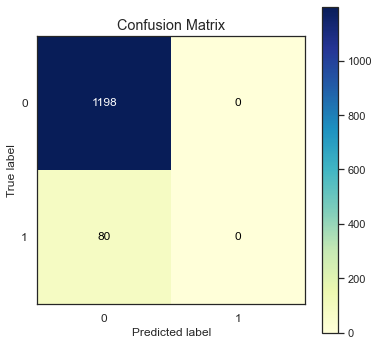

In [131]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');

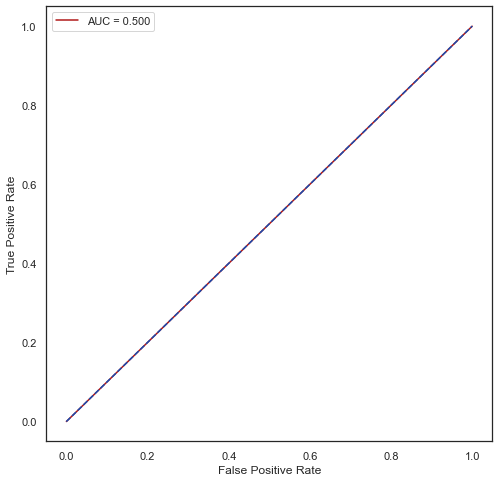

In [132]:
# visualize Roc AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

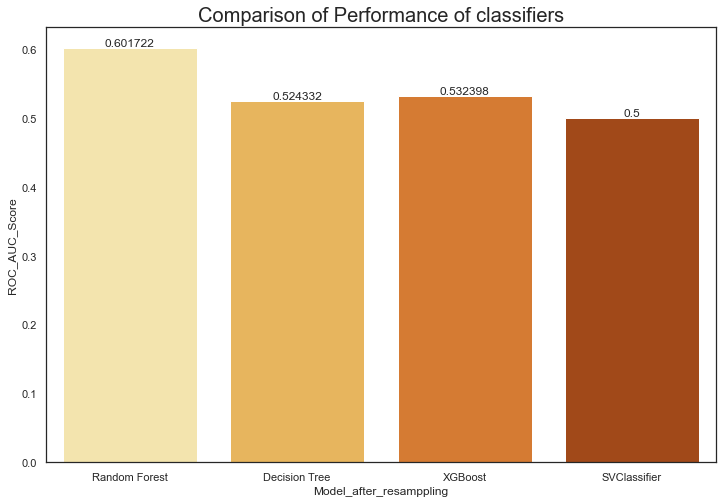

In [133]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['Random Forest','Decision Tree','XGBoost','SVClassifier'],
        'Score': [acc_test_rf, acc_test_dt, acc_test_xgb, acc_test_svc],
        
        'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, xgb_roc_auc_score, svc_roc_auc_score]
    }
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="ROC_AUC_Score", data= Performance, palette="YlOrBr")
ax.bar_label(ax.containers[0])
plt.title('Comparison of Performance of classifiers',fontsize=20)
plt.show()

In [134]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Score,ROC_AUC_Score
0,Random Forest,0.935055,0.601722
2,XGBoost,0.937402,0.532398
1,Decision Tree,0.917840,0.524332
3,SVClassifier,0.937402,0.500000


In [135]:
import pickle as pkl
pkl.dump(xgb, open("stroke.pickle.dat", "wb"))

In [136]:
pkl.dump(xgb, open("stroke.pkl", "wb"))

In [137]:
pkl.dump(rf, open("stroke_rf.pkl", "wb"))

In [138]:
x_data_balanced[0]

array([0.        , 0.29199219, 0.        , 0.        , 1.        ,
       1.        , 0.23146524, 0.18098511, 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [140]:
print(df.iloc[:1])

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   

   avg_glucose_level   bmi  stroke  work_type_Govt_job  \
0             228.69  36.6       1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   

   work_type_children  smoking_status_Unknown  smoking_status_formerly smoked  \
0                   0                       0                               1   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  


In [141]:
y_pred_new = xgb.predict([[1,49.0,0,0,1,0,171.23,34.40,0,0,1, 0, 0, 0, 0, 0, 0]])

In [142]:
y_pred_new

array([0])

In [143]:
y_pred_new = xgb.predict([[0,0.45, 1, 1, 1, 1, 0.23146524, 0.18098511, 
                           1, 1, 1, 1 , 1 , 1, 1, 1]])

In [144]:
y_pred_new

array([0])